# Support Vector Machines

Support Vector Machines (SVM) represent a versatile and potent paradigm in machine learning, adeptly handling both classification and regression tasks. The central tenet of SVM revolves around the discovery of an optimal hyperplane within a high-dimensional feature space, strategically demarcating data points belonging to disparate classes. This hyperplane's selection hinges on the maximization of the margin, which denotes the spatial interval between the hyperplane and the nearest data points emanating from each distinct class. Thus, SVM operates as a finely calibrated equilibrium between achieving high-fidelity alignment with training data and fostering robust extrapolation to novel, previously unseen data instances {cite:p}`scholkopf2018learning,sklearnUserGuide`.

## Basic principles of SVM

- **Hyperplane**: A discernment boundary that partitions data instances of divergent classes, essentially serving as a segregation threshold.
- **Support Vectors**: Data instances in closest proximity to the hyperplane, wielding significant influence over its placement and orientation.
- **Margin**: The spatial expanse between the hyperplane and the closest support vectors, acting as a buffer zone against potential misclassification.
- **Kernel Trick**: An ingenious technique empowering SVM to navigate intricate non-linear data configurations by effectively remapping data points to an augmented dimensional space.
- **C Parameter**: Governs the compromise between maximizing the margin's breadth and minimizing classification errors, thereby shaping SVM's risk appetite.
- **Kernel Functions**: Distinct kernel functions (e.g., linear, polynomial, radial basis function) pivotal in shaping the curvature and structure of the resultant decision boundary.

## Support Vector Classifiers

Support Vector Classifiers (SVCs) are a fundamental tool in binary classification problems, where the objective is to separate two classes, typically labeled as -1 and 1, by finding an optimal hyperplane. The mathematical representation of a hyperplane is as follows {cite:p}`kuttler2020first, james2023introduction`:

\begin{equation} \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p = 0 \end{equation}

In this equation:
- $ \beta_0, \beta_1, \ldots, \beta_p $ are coefficients that define the orientation and position of the hyperplane.
- $ x_1, x_2, \ldots, x_p $ are the features of the data point.

<font color='Blue'><b>Example:</b></font> Consider a two-dimensional space defined by the X-Y plane. A concrete example of a hyperplane within this context could be represented by the equation {cite:p}`james2023introduction`:

\begin{equation} 1 + 2X_1 + 3X_2 = 0\end{equation}

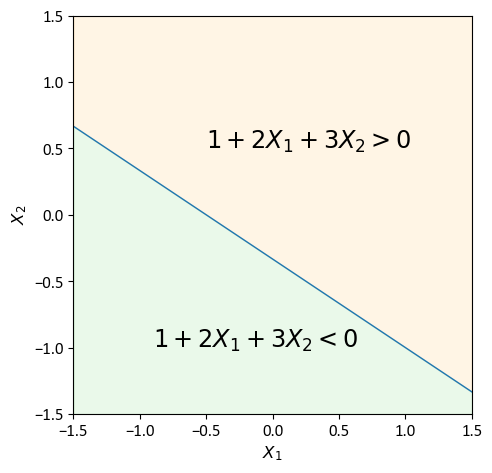

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../mystyle.mplstyle')

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(5, 5))

# Generate a range of values for X1
X1 = np.linspace(-1.5, 1.5, 1000)

# Calculate corresponding values for X2 based on the hyperplane equation -(1 + 2*X1)/3
X2 = -(1 + 2*X1)/3

# Plot the hyperplane
ax.plot(X1, X2)

# Set labels, limits, and aspect ratio for X and Y axes
ax.set(xlabel=r'$X_1$', ylabel=r'$X_2$', xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], aspect=1)

# Fill the region where 1 + 2X1 + 3X2 > 0 with a light green color and annotate
ax.fill_between(X1, -1.5, -(1 + 2*X1)/3, color='LimeGreen', alpha=0.1)
ax.annotate(r'$1 + 2X_1 + 3X_2 > 0$', xy=(-0.5, 0.5), fontsize='xx-large')

# Fill the region where 1 + 2X1 + 3X2 < 0 with an orange color and annotate
ax.fill_between(X1, -(1 + 2*X1)/3, 1.5, color='Orange', alpha=0.1)
ax.annotate(r'$1 + 2X_1 + 3X_2 < 0$', xy=(-0.9, -1), fontsize='xx-large')
ax.grid(False)
plt.tight_layout()

By executing this code snippet, a vivid graphical representation of a hyperplane within a two-dimensional space emerges. The code generates a plot where the hyperplane, defined by the equation $1 + 2X_1 + 3X_2 = 0$, partitions the plane into regions where this inequality holds true and where it does not. This not only exemplifies the concept of a hyperplane in a 2D plane but also underscores the utility of programming tools in visualizing mathematical constructs.

## Formulating the Maximal Margin Classifier

In this section, we explain how to construct the maximal margin hyperplane, which is the optimal boundary for separating two classes of data points. We assume that we have a set of *n* training observations *$x_1, ..., x_n \in \mathbb{R}^p$*, each with a corresponding class label *$y_1, ..., y_n \in \{-1, 1\}$*. The class label indicates which side of the hyperplane the observation belongs to.

The maximal margin hyperplane is the one that maximizes the distance between the hyperplane and the nearest data points from each class. This distance is called the margin (*$M$*), and it represents how well the hyperplane separates the classes. The larger the margin, the lower the chance of misclassification.

To find the maximal margin hyperplane, we need to solve an optimization problem that involves finding the coefficients *$\beta_0, \beta_1, ..., \beta_p$* that define the hyperplane equation:

\begin{equation}
\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p = 0
\end{equation}

Where:
- *$x_1$*, *$x_2$*, ..., *$x_p$* are the features of any observation.
- *$\beta_0$* is the intercept term, and *$\beta_1$*, *$\beta_2$*, ..., *$\beta_p$* are the slope terms.

The optimization problem has the following constraints for each training observation (*$i$*) {cite:p}`james2023introduction`:

\begin{equation}
y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}) \geq M (1 - \epsilon_i)
\end{equation}

Where:
- *$y_i$* is the class label of the *$i$*-th observation, taking values -1 or 1.
- *$x_{i1}$*, *$x_{i2}$*, ..., *$x_{ip}$* are the features of the *$i$*-th observation.
- *$\epsilon_i$* is a slack variable that allows some flexibility in the classification. It takes a value of zero for points that are correctly classified and outside the margin, a positive value for points that are inside the margin or on the wrong side of the hyperplane, and a negative value for points that are on the hyperplane.

These constraints ensure that the hyperplane separates the classes as well as possible, while allowing some errors for noisy or overlapping data.

Another constraint that normalizes the coefficients is given by:

\begin{equation}
\sum_{j=1}^{p} \beta_j^2 = 1
\end{equation}

This constraint prevents the coefficients from becoming arbitrarily large, which would affect the margin calculation.

Additionally, the regularization parameter *$C$* controls the trade-off between maximizing the margin *$M$* and minimizing the errors *$\epsilon_i$*:

\begin{equation}
\sum_{i=1}^{n} \epsilon_i \leq C
\end{equation}

The regularization parameter *$C$* limits the total amount of slack allowed in the classification. A small value of *$C$* implies a large margin and a strict classification, while a large value of *$C$* implies a small margin and a flexible classification.

The optimization problem aims to find the coefficients *$\beta_0, \beta_1, ..., \beta_p$* and the slack variables *$\epsilon_i$* that satisfy these constraints and maximize the margin *$M$*. By solving this problem, we obtain the maximal margin hyperplane that best separates the classes in the feature space. The data points that are closest to the hyperplane and determine its position and margin are called support vectors. They have the most influence on the classification outcome.

In [2]:
import numpy as np
from sklearn.svm import SVC

# Sample data (features and class labels)
X = np.array([[2, 1], [3, 3], [4, 3], [5, 4], [6, 5], [7, 5], [8, 6], [9, 7]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

# Create a Support Vector Classifier
svc = SVC(kernel='linear')

# Fit the model to the data
svc.fit(X, y)

# Get the support vectors
support_vectors = svc.support_vectors_
print("Support Vectors:")
for i in range(support_vectors.shape[1]):
    print(f'\t\t{support_vectors[:, i]}')

# Get the coefficients (beta values) and the intercept (beta_0)
coefficients = svc.coef_
intercept = svc.intercept_
print("Coefficients (Beta values):\t\t", coefficients)
print("Intercept (Beta_0):\t\t\t", intercept)

# Get the margin (M)
margin = 2 / np.linalg.norm(coefficients)
print(f'Margin (M):\t\t\t\t {margin:+.3f}')

# Get the slack variables (epsilon values)
dual_coefs = svc.dual_coef_[0]
epsilon_values = 1 - dual_coefs
print("Slack Variables (Epsilon values):\t", epsilon_values)

# Get the regularization parameter (C)
C = 1 / (2 * svc.C)
print("Regularization Parameter (C):\t\t", C)

Support Vectors:
		[5. 6.]
		[4. 5.]
Coefficients (Beta values):		 [[1. 1.]]
Intercept (Beta_0):			 [-10.]
Margin (M):				 +1.414
Slack Variables (Epsilon values):	 [2. 0.]
Regularization Parameter (C):		 0.5


`````{admonition} Note
:class: warning

Note that in the above code:

* The `support_vectors` variable contains the support vectors that were identified by the Support Vector Classifier (SVC) during the fitting of the model. Support vectors are the data points from the training dataset that are closest to the decision boundary (hyperplane) and have the most influence on defining the decision boundary. These vectors "support" the position of the decision boundary and, as a result, are crucial in the classification process. Support vectors are important in SVM (Support Vector Machine) algorithms because they determine the margin, which is the distance between the decision boundary and the nearest data points. In the context of the code you've provided, `support_vectors` will hold the coordinates of these important data points in your feature space.

* The variable `coefficients` stores the coefficients associated with the features in the Support Vector Classifier (SVC) model. These coefficients represent the weights or importance of each feature in the decision boundary equation. For an SVC model with a linear kernel, the decision boundary is a hyperplane, and the coefficients represent the normal vector to this hyperplane. In other words, they define the orientation of the hyperplane in the feature space. In the context of your code, `coefficients` contains the coefficients for each feature dimension, and you can use them to understand the relative importance of each feature in the classification decision. These coefficients are determined during the training of the SVC model and are essential for making predictions.

* The variable `intercept` stores the intercept of the decision boundary in the Support Vector Classifier (SVC) model. The intercept represents the offset of the decision boundary from the origin in the feature space. For an SVC model with a linear kernel, the decision boundary is a hyperplane defined by the coefficients and the intercept. The intercept determines the position of this hyperplane along the feature space's axis that is orthogonal to the hyperplane. In simpler terms, the intercept shifts the decision boundary back and forth along this axis. If we have a positive intercept, it means the decision boundary is shifted in one direction, and if you have a negative intercept, it's shifted in the opposite direction. In the code, `intercept` contains the intercept value for the decision boundary and is determined during the training of the SVC model. It plays a crucial role in the classification process.

* In the above code, the variable `margin` calculates the margin of the Support Vector Classifier (SVC) model. The margin represents the distance between the decision boundary (hyperplane) and the nearest support vectors. It is a measure of how well the model can separate the classes. The formula used to calculate `margin` is as follows:

    ```python
    margin = 2 / np.linalg.norm(coefficients)
    ```

* In the above code, the comments indicate that we are obtaining the slack variables (epsilon values) in the context of a Support Vector Classifier (SVC) model. Let's break down what these lines of code are doing:

    1. `dual_coefs = svc.dual_coef_[0]`: In an SVM, the dual coefficients represent the Lagrange multipliers associated with the support vectors. These coefficients indicate the importance of each support vector in determining the location and orientation of the decision boundary. By accessing `svc.dual_coef_`, you are retrieving the dual coefficients for the support vectors. The `[0]` indexing suggests that you are extracting the dual coefficients for the first class (typically the positive class) of the binary classification problem.

    2. `epsilon_values = 1 - dual_coefs`: The variable `epsilon_values` is then calculated. Epsilon values, also known as slack variables, are introduced in soft-margin SVMs. They measure the degree to which a data point is allowed to be on the wrong side of the decision boundary while still satisfying the margin constraints. In this calculation, you are computing the epsilon values by subtracting the dual coefficients from 1. A value close to 1 indicates that the corresponding support vector is far from the margin, while a value close to 0 indicates that the support vector is very close to or on the wrong side of the margin.

    These values are useful for understanding the margin and classification properties of the SVM. A larger epsilon value indicates a greater margin violation by the corresponding support vector, and a smaller value indicates that the support vector is correctly classified or is very close to the margin.

`````

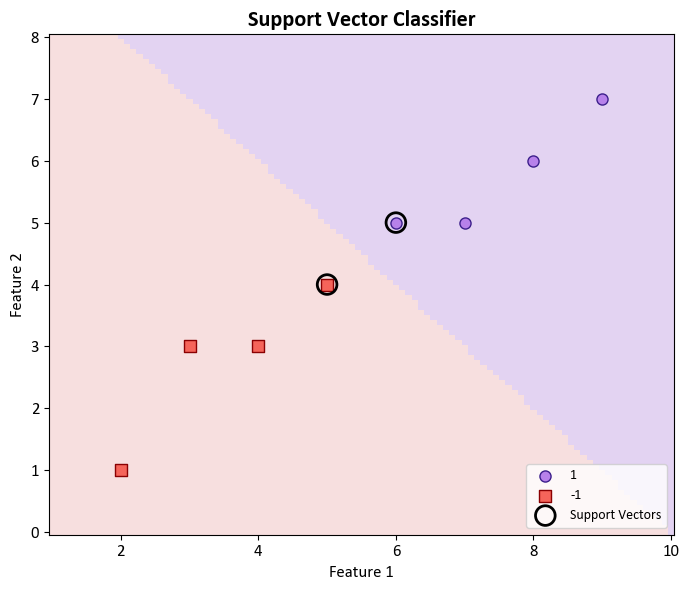

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

colors = ["#f5645a", "#b781ea"]
edge_colors = ['#8A0002', '#3C1F8B']
cmap_light = ListedColormap(['#f7dfdf', '#e3d3f2'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

DecisionBoundaryDisplay.from_estimator(svc, X, cmap=cmap_light, ax=ax,
                                       response_method="predict", plot_method="pcolormesh",
                                       xlabel='Feature 1', ylabel='Feature 2', shading="auto")

# Define labels and markers for different classes
class_labels = [1, -1]
markers = ['o', 's']

for label, marker in zip(class_labels, markers):
    class_data = X[y == label]
    ax.scatter(class_data[:, 0], class_data[:, 1], fc=colors[label == 1],
               ec=edge_colors[label == 1], label=str(label), marker=marker)

# Plot support vectors
support_vectors = svc.support_vectors_
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200,
           facecolors='none', edgecolors='k', lw=2, label='Support Vectors')

ax.legend(loc = 'lower right')
ax.set_title("""Support Vector Classifier""", fontweight='bold', fontsize=16)
ax.grid(False)

plt.tight_layout()

In the context of binary classification using a Support Vector Machine (SVM) with a linear kernel, it is possible to retrieve the coefficients associated with the decision boundary. These coefficients are indicative of the feature weights that define the orientation of the decision boundary, often referred to as a hyperplane. The equation representing the decision boundary takes the form:

\begin{equation}w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0\end{equation}

Here, $w_1$ and $w_2$ represent the coefficients, $x_1$ and $x_2$ denote the features, and $b$ stands for the intercept.

To access the coefficients $w_1$ and $w_2$, you can utilize `svc.coef_`, and to obtain the intercept $b$, you may employ `svc.intercept_` from your SVM model denoted as `svc`. The procedure for accessing these values is as follows:

In [4]:
# Hyperplane equation
w1, w2 = svc.coef_[0]
b = svc.intercept_[0]
equation = f'${w1:+.3f} \cdot x_1 {w2:+.3f} \cdot x_2 {b:+.3f} = 0$'

# Display the equation using LaTeX
from IPython.display import Latex, display
display(Latex(equation))

<IPython.core.display.Latex object>

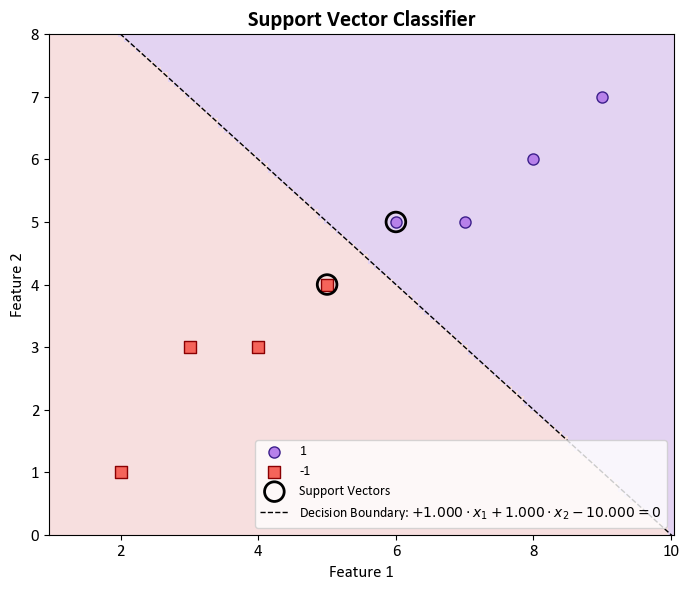

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

colors = ["#f5645a", "#b781ea"]
edge_colors = ['#8A0002', '#3C1F8B']
cmap_light = ListedColormap(['#f7dfdf', '#e3d3f2'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Decision boundary display
DecisionBoundaryDisplay.from_estimator(svc, X, cmap=cmap_light, ax=ax, response_method="predict", plot_method="pcolormesh", xlabel='Feature 1', ylabel='Feature 2', shading="auto")

# Define labels and markers for different classes
class_info = [(1, 'o', colors[1]), (-1, 's', colors[0])]

for label, marker, color in class_info:
    class_data = X[y == label]
    ax.scatter(class_data[:, 0], class_data[:, 1], fc=color, ec=edge_colors[label == 1],
               label=str(label), marker=marker)

# Plot support vectors
support_vectors = svc.support_vectors_
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none',
           edgecolors='k', lw=2, label='Support Vectors')

# Decision boundary line
w1, w2 = svc.coef_[0]
b = svc.intercept_[0]
line_x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
line_y = (-w1 / w2) * line_x - (b / w2)
ax.plot(line_x, line_y, color='black', linestyle='--', label= f'Decision Boundary: {equation}')

# Plot settings
ax.legend(loc = 'lower right')
ax.set_title("""Support Vector Classifier""", fontweight='bold', fontsize=16)
ax.grid(False)
ax.set_ylim(0, 8)
plt.tight_layout()

`````{admonition} Support Vector Classifier

The support vector classifier (SVC) is a robust classification method that categorizes test observations based on their positioning relative to a carefully chosen hyperplane. This hyperplane is strategically selected to efficiently segregate the majority of training observations into two distinct classes, even though there might be a minor number of misclassifications.

Consider a set of $n$ training observations, $x_1, \ldots, x_n \in \mathbb{R}^p$, each associated with class labels $y_1, \ldots, y_n \in \{-1, 1\}$. The goal of the support vector classifier is to optimize the following mathematical formulation:

\begin{align}
&\text{Maximize the margin } M \\
&\text{subject to:} \\
&\begin{cases}
\displaystyle{y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}) \geq M (1 - \epsilon_i)}\\
\displaystyle{\sum_{j=1}^{p} \beta_j^2 = 1}\\
\displaystyle{\epsilon_i \geq 0} \\
\displaystyle{\sum_{i=1}^{n} \epsilon_i \leq C}
\end{cases}
\end{align}

In this context:

- The primary objective is to maximize the margin ($M$), which signifies the separation between classes and enhances the classifier's robustness.
- The formulation guarantees that each training observation ($x_i$) lies on the correct side of its corresponding hyperplane. A slack variable ($\epsilon_i$) accommodates a controlled level of misclassification.
- The constraint $\sum_{j=1}^{p} \beta_j^2 = 1$ ensures that the chosen hyperplane remains properly scaled.
- Slack variables ($\epsilon_i$) provide room for observations to fall within the margin or on the incorrect side of the hyperplane.
- The parameter $C$, a nonnegative tuning parameter, constrains the cumulative magnitude of slack variables, thereby striking a balance between maximizing the margin and allowing for a certain level of misclassification.

Through the harmonious interplay of these components, the support vector classifier effectively designs a hyperplane that optimally segregates classes while gracefully managing the intricacies inherent in real-world datasets. The selection of $C$ and the subsequent determination of the optimal hyperplane contribute to the SVC's ability to deliver accurate classification results, even in the presence of noise or outliers.

`````

## Classification with Non-Linear Decision Boundaries

Support Vector Machines (SVMs) represent a significant leap beyond the conventional support vector classifier, enabling the handling of intricate non-linear decision boundaries in classification tasks. This transformative advancement stems from a novel approach that expands the feature space, providing a more comprehensive representation of the underlying data structure {cite:p}`james2023introduction`.

### Augmented Feature Space

In contrast to the reliance on *$p$* traditional features:

\begin{equation}
X_1, X_2, \ldots , X_p.
\end{equation}

SVMs introduce a revolutionary paradigm by extending the support vector classifier to function within an augmented feature space encompassing *$2p$* features:

\begin{equation}
X_1, X_1^2, X_2, X_2^2, \ldots , X_p, X^2_p.
\end{equation}

This augmentation equips SVMs to adeptly address intricate classification complexities characterized by non-linear relationships {cite:p}`james2023introduction`.

### Mathematical Formulation

The foundation of this advancement resides in the core optimization problem of SVMs, defined as follows:

\begin{align}
&\text{Maximize the margin } M \\
&\text{subject to:} \\
&\begin{cases}
\displaystyle{y_i \left(\beta_0 + \sum_{j=1}^{p}\beta_{j1} x_{ij}+\sum_{j=1}^{p}\beta_{j2} x_{ij}^2 \right)
\geq M (1-\epsilon_i)}
\\
\displaystyle{\sum_{j=1}^{p} \sum_{k=1}^{2} \beta_{jk}^2 = 1}
\\
\displaystyle{\epsilon_i \geq 0}
\\
\displaystyle{\sum_{i=1}^{n} \epsilon_i \leq C.}
\end{cases}
\end{align}

Key Insights from this Formulation:

- The ultimate objective remains the maximization of the margin (*$M$*), embodying the distinction between classes.
- The introduction of quadratic terms (*$x_{ij}^2$*) for each of the *$p$* original features enhances predictive capacity, enabling SVMs to capture intricate non-linear relationships inherent in the data.
- Analogous to the conventional support vector classifier, the conditions ensure that training observations (*$x_i$*) consistently align with the correct side of their respective hyperplanes. The incorporation of slack variables (*$\epsilon_i$*) accommodates potential misclassifications.
- A noteworthy addition lies in the utilization of coefficients (*$\beta_{j1}$* and *$\beta_{j2}$*) to capture both linear and quadratic facets of the transformed features. This versatility empowers SVMs to delineate non-linear decision boundaries.
- The constraint *$\sum_{j=1}^{p} \sum_{k=1}^{2} \beta_{jk}^2 = 1$* ensures the appropriate scaling of the augmented hyperplane within the expanded feature space.
- In alignment with its role in the original support vector classifier, the regularization parameter *$C$* retains its significance in balancing the optimization trade-off between maximizing the margin and permitting controlled misclassification.

<font color='Blue'><b>Example</b></font>: In this code example, a Decision Tree Classifier is utilized to illustrate decision boundaries on synthetic data. The synthetic dataset is generated using the `make_blobs` function from scikit-learn, designed for creating artificial datasets for various machine learning experiments. This particular dataset consists of the following characteristics:

- **Number of Samples:** 1000
- **Number of Features:** 2
- **Number of Classes:** 2
- **Random Seed (random_state):** 0
- **Cluster Standard Deviation (cluster_std):** 1.0

**Features:**
- The dataset contains 1000 data points, each described by a pair of feature values. These features are represented as 'Feature 1' and 'Feature 2'.

**Outcome (Target Variable):**
- The dataset also includes a target variable called 'Outcome.' This variable assigns each data point to one of two distinct classes, identified as 'Class 0' and 'Class 1'.

The dataset has been designed to simulate a scenario with two well-separated clusters, making it suitable for binary classification tasks. Each data point in this dataset is associated with one of the two classes, and it can be used for practicing and evaluating machine learning algorithms that deal with binary classification problems.

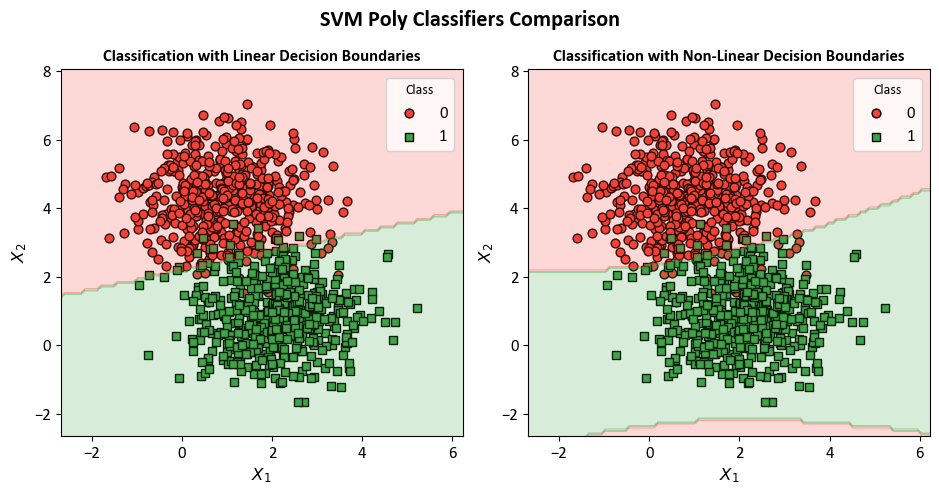

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=1.0)

# Define colors and markers for data points
colors, markers = ["#f44336", "#40a347"], ['o', 's']
cmap_ = ListedColormap(colors)
# Titles for the subplots
titles = ['Linear Decision Boundaries', 'Non-Linear Decision Boundaries']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(9.5, 5))
axes = axes.ravel()

# Create SVM models and visualize decision boundaries
for ax, deg in zip(axes, [1, 2]):
    # Create SVM model with specific parameters
    clf = svm.SVC(kernel="poly", degree=deg, gamma="auto", C=1).fit(X, y)
    
    # Scatter plot of data points
    for num in np.unique(y):
        ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                   s=40, edgecolors="k", marker=markers[num], label=str(num))

    # Display decision boundaries
    disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict",
                                                  cmap=cmap_, alpha=0.2, ax=ax,
                                                  xlabel=r'$X_{1}$', ylabel=r'$X_{2}$')
    
    # Set the title for the subplot
    ax.set_title(f'Classification with {titles.pop(0)}', weight='bold')
    ax.grid(False)
    ax.legend(title='Class', fontsize=12)

# Add a title to the entire figure
plt.suptitle("SVM Poly Classifiers Comparison", fontsize=16, fontweight='bold')
# Adjust layout
plt.tight_layout()

## The Support Vector Machine: Kernelized Enhancement

### Linear Support Vector Classifier

The linear support vector classifier can be expressed as follows {cite:p}`james2023introduction`:

\begin{align}
f(x) = \beta_0 + \sum_{i\in \mathcal{S}} \alpha_i\langle x, x_i\rangle,
\end{align}

Where:
- $f(x)$ represents the decision function that outputs a classification score for the input feature vector *$x$*.
- $\beta_0$ is the intercept term.
- $\alpha_i$ are the coefficients associated with the support vectors *$x_i$*.
- $\langle x, x_i\rangle$ denotes the inner product between the input vector *$x$* and the support vector *$x_i$*.
- The set $\mathcal{S}$ contains indices corresponding to the support vectors, which are the training samples that lie closest to the decision boundary.

`````{admonition} Remark
:class: important

Recall that the inner product of two *r*-vectors *$a$* and *$b$* is formally defined as $\displaystyle{\langle a, b \rangle = \sum_{i=1}^{r} a_i b_i}$, where the sum extends over *$r$* components {cite:p}`kuttler2020first, james2023introduction`.

`````

### Kernelized Format

In a more generalized form, we replace the inner product with a function denoted as the **kernel**:

\begin{align}
K(x_i, x_{i'}) = K(x_{i'}, x_i),
\end{align}

Here, *$K$* is a function that computes the similarity between two data points *$x_i$* and *$x_{i'}$*. This kernelized representation enables us to express *$f(x)$* as {cite:p}`james2023introduction`:

\begin{align}
f(x) = \beta_0 + \sum_{i\in \mathcal{S}} \alpha_iK(x_i, x_{i'}).
\end{align}

Various types of kernels can be harnessed in SVMs to capture different types of relationships between data points. Here are some illustrative examples:

- **Linear Kernel:** $\displaystyle{K(x_i, x_{i'}) = \sum_{j=1}^{p} x_{ij}x_{i'j}}$
- **Polynomial Kernel:** $\displaystyle{K(x_i, x_{i'}) = \left(1+\sum_{j=1}^{p} x_{ij}x_{i'j}\right)^d}$
- **Radial Kernel (RBF):** $\displaystyle{K(x_i, x_{i'}) = \exp\left(-\gamma \sum_{j=1}^{p} (x_{ij}-x_{i'j})^2\right)}$ 

where $d$ and $\gamma$ are hyperparameters that influence the shape and flexibility of the decision boundary.

Scikit-learn's SVM implementation provides flexibility in choosing the appropriate kernel and tuning hyperparameters to achieve the best classification performance for different types of data. The classifier aims to maximize the margin while ensuring accurate classification and controlled misclassification, guided by the chosen kernel's ability to capture the data's underlying structure.

`````{admonition} Remark
:class: important

1. In the context of the provided text, $x'$ is used as a placeholder to represent another data point. It's not a specific variable; rather, it's a general notation to indicate that the kernel function $K(x_i, x_{i'})$ computes the similarity between the data point $x_i$ and some other data point $x_{i'}$.

    So, $x_i$ and $x_{i'}$ are two different data points, and $K(x_i, x_{i'})$ measures the similarity between them using the chosen kernel function. The notation $x'$ is used to emphasize that this kernel function can be applied to any pair of data points in the dataset, not just $x_i$ and $x_{i'}$. It's a way to express the general concept of similarity between data points in the context of Support Vector Machines (SVM) and kernelized representations.
    
1. The sklearn function also includes the following kernels {cite:p}`sklearnUserGuide`:

    * **Sigmoid Kernel (kernel='sigmoid'):**
    The sigmoid kernel maps data into a sigmoid-like space. It can be useful when dealing with data that might not be linearly separable in the original feature space. However, it's less commonly used compared to other kernels, as it might be sensitive to hyperparameters.
    
    The sigmoid kernel is a type of kernel function used in machine learning, particularly in support vector machines (SVMs). Kernel functions play a crucial role in SVMs, enabling them to operate in a higher-dimensional space without explicitly calculating the coordinates of the data points in that space. The sigmoid kernel is defined as:

    \begin{equation} K(x, y) =  \tanh(\alpha \langle x, y \rangle + c) = \tanh(\alpha \cdot x^T y + c), \end{equation}

    where $ x $ and $ y $ are the input vectors, $ \alpha $ is a scaling parameter, and $ c $ is a constant. The hyperbolic tangent function ($ \tanh $) ensures that the values of the kernel function lie in the range $(-1, 1)$.  It is also known as the hyperbolic tangent kernel or the Multi-Layer Perceptron (MLP) kernel.

    The sigmoid kernel is particularly useful when dealing with non-linear data and can capture complex relationships between data points. However, its performance may vary depending on the specific characteristics of the dataset and the choice of hyperparameters, such as $ \alpha $ and $ c $. It is essential to fine-tune these parameters to achieve optimal results in SVM applications employing the sigmoid kernel.

    * **Precomputed Kernel (kernel='precomputed'):**
    Instead of using one of the built-in kernels, you can provide your own precomputed kernel matrix. This is useful when you've already calculated the similarity or distance between data points using a custom kernel and want to use it directly.
    
1. The Support Vector Machine (SVM) algorithm was initially developed for binary classification tasks, where it aimed to separate data points into two distinct classes. However, in practice, many real-world problems involve multiple classes. Scikit-learn (sklearn), a widely used machine learning library, can handle multiclass classification with SVMs and other algorithms through techniques such as one-vs-one and one-vs-rest strategies {cite:p}`sklearnUserGuide`.

    In the one-vs-one strategy, a separate binary classifier is trained for each pair of classes, effectively dividing the multiclass problem into a series of binary decisions. During classification, these binary classifiers vote, and the class with the most votes is the predicted class.

    Conversely, the one-vs-rest strategy trains one binary classifier for each class, treating it as the positive class while considering all other classes as the negative class. The final prediction assigns the class associated with the binary classifier that outputs the highest confidence.

    Sklearn's ability to handle multiclass problems with SVMs is an extension of the original binary classification concept, enabling the algorithm to be applied to a wider range of practical applications. This extension enhances the versatility of SVMs and makes them more applicable to academic and real-world scenarios involving multiple classes {cite:p}`sklearnUserGuide`.
`````

<font color='Blue'><b>Example:</b></font> In this example, we're using SVM classifiers along with matplotlib to demonstrate how various SVM kernels behave on the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). We aim to show their decision boundaries in a grid of four smaller plots (2x2).

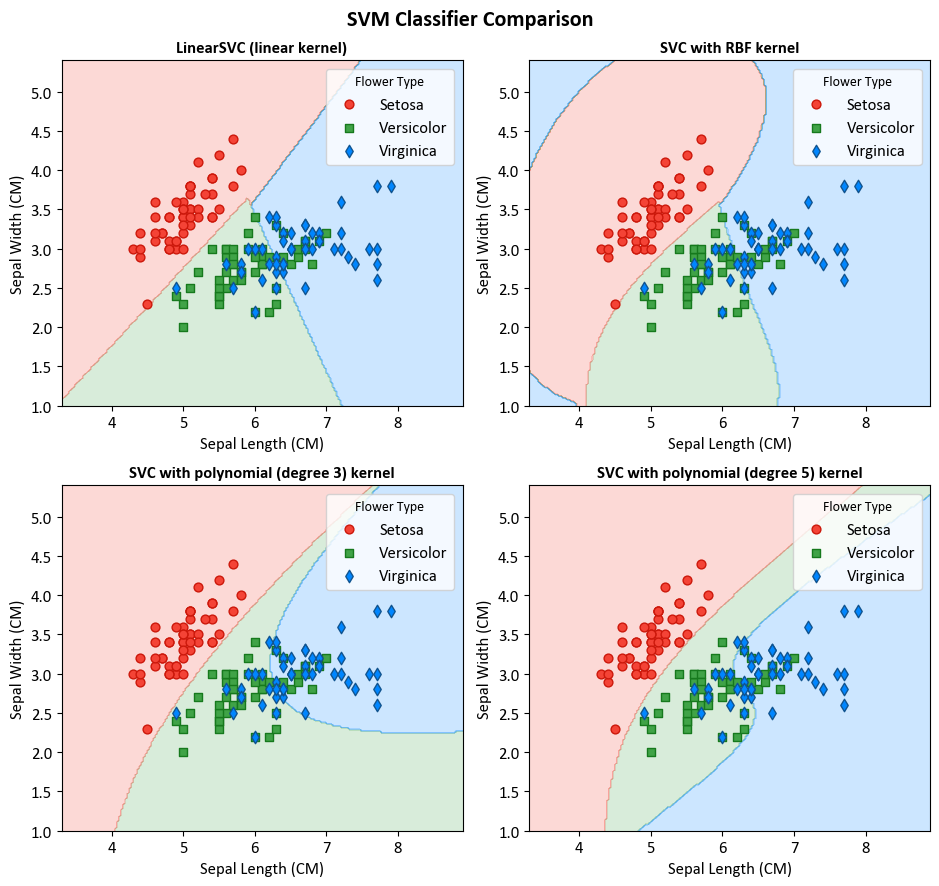

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Load data
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Create SVM models
models = [svm.SVC(kernel="linear", C=1.0),
          svm.SVC(kernel="rbf", gamma=0.7, C=1.0),
          svm.SVC(kernel="poly", degree=3, gamma="auto", C=1.0),
          svm.SVC(kernel="poly", degree=5, gamma="auto", C=1.0)]

# Feature labels
xlabel, ylabel = [x.title().replace('Cm','CM') for x in iris.feature_names[:2]]

# Fit models to data
models = [clf.fit(X, y) for clf in models]

# Titles for the plots
titles = ["LinearSVC (linear kernel)",
          "SVC with RBF kernel",
          "SVC with polynomial (degree 3) kernel",
          "SVC with polynomial (degree 5) kernel"]

# Define colors and markers
colors = ["#f44336", "#40a347", '#0086ff']
edge_colors = ["#cc180b", "#16791d", '#11548f']
markers = ['o', 's', 'd']
cmap_ = ListedColormap(colors)

# Create 2x2 grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(9.5, 9))

# Create a dictionary to map target names to numbers
target_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Plot decision boundaries
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", cmap=cmap_,
                                                  grid_resolution = 200,
                                                  alpha=0.2, ax=ax,
                                                  xlabel=xlabel, ylabel=ylabel)
    
    # Scatter plot of data points with target names
    for num in np.unique(y):
        ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                   s=40, ec=edge_colors[num], marker=markers[num], label=target_names[num])
        
    ax.set_title(title, weight='bold')
    ax.grid(False)
    ax.legend(title = 'Flower Type', fontsize = 12)

# Add a title
plt.suptitle("SVM Classifier Comparison", fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

<!-- `````{admonition} ROC Curve and Key Concepts

The Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of binary classification models across different classification thresholds. It illustrates the trade-off between the sensitivity (True Positive Rate, TPR) and the specificity (True Negative Rate, TNR) of the model. The ROC curve plots TPR against the False Positive Rate (FPR) for various threshold values {cite:p}`bloch2010progress`.

The key concepts are as follows {cite:p}`bloch2010progress`:

1. **Binary Classification Problem**: ROC is used in binary classification scenarios where the target variable has two classes, often denoted as positive and negative. Examples include medical diagnoses (disease or no disease) or spam classification (spam or not spam).

1. **True Positive Rate (Sensitivity)**: It's the ratio of correctly predicted positive instances to the total actual positive instances. It indicates how well the model identifies positive instances.

   \begin{equation}
   TPR = \frac{TP}{TP + FN}
   \end{equation}
   where $TP$ represents the number of true positive instances and $FN$ represents the number of false negative instances. Sensitivity indicates the model's ability to correctly identify positive instances.

1. **False Positive Rate**: It's the ratio of incorrectly predicted positive instances to the total actual negative instances. It measures how often the model makes false predictions for the negative class.
   \begin{equation}
   FPR = \frac{FP}{FP + TN}
   \end{equation}
   where $FP$ represents the number of false positive instances and $TN$ represents the number of true negative instances. FPR quantifies the rate at which the model incorrectly predicts positive instances for the negative class.

1. **True Negative Rate (Specificity)**: It's the ratio of correctly predicted negative instances to the total actual negative instances. It shows how well the model identifies negative instances.
   \begin{equation}
   TNR = \frac{TN}{TN + FP}
   \end{equation}
   Specificity measures the model's ability to correctly identify negative instances.

1. **False Negative Rate**: It's the ratio of incorrectly predicted negative instances to the total actual positive instances. It quantifies the rate at which the model misclassifies positive instances.
   \begin{equation}
   FNR = \frac{FN}{FN + TP}
   \end{equation}
   FNR represents the rate at which the model incorrectly predicts negative instances for the positive class.

1. **ROC Curve**: The ROC curve is a plot of sensitivity (true positive rate) against the false positive rate for various classification thresholds. Each point on the ROC curve corresponds to a particular threshold. The curve provides a visual representation of how well the model separates the two classes as the threshold changes.

1. **Area Under the Curve (AUC)**: The AUC measures the area under the ROC curve. It quantifies the overall performance of the model. An AUC value closer to 1 indicates a better-performing model, while an AUC of 0.5 suggests that the model's performance is no better than random guessing.

   - AUC = 1: Perfect classifier
   - AUC = 0.5: Random guessing
   - AUC > 0.5: Model performs better than random guessing
   - AUC < 0.5: Model performs worse than random guessing

````` -->

## sklearn's  SVC and SVR

Support Vector Machine (SVM), a prominent machine learning algorithm accessible within the scikit-learn (sklearn) library, exhibits versatility and finds utility in both classification and regression tasks {cite:p}`sklearnUserGuide`. Within the sklearn SVM module, two primary classes are available:

* **Support Vector Classification (SVC):**
  SVC specializes in addressing classification tasks. Its core aim is to identify the optimal hyperplane that effectively segregates data points into distinct classes, with the additional goal of maximizing the margin separating these classes. The definition of this hyperplane is influenced by a subset of data points referred to as support vectors. Furthermore, SVC can adeptly address both linear and non-linear classification challenges through the application of various kernel functions, including linear, polynomial, radial basis function (RBF), and sigmoid kernels {cite:p}`sklearnUserGuide`.

* **Support Vector Regression (SVR):**
  In contrast to SVC, SVR is tailored to regression tasks. Instead of seeking a hyperplane for class separation, SVR aims to determine a hyperplane that minimizes the error between predicted values and actual target values, all while considering a predefined margin of tolerance. Similar to SVC, SVR possesses the capability to handle non-linear regression tasks through the use of kernel functions {cite:p}`sklearnUserGuide`.

The choice of kernel and hyperparameters is a pivotal decision, contingent on the data's characteristics and the specific problem at hand. Rigorous data preprocessing and comprehensive model evaluation are indispensable for achieving optimal performance within the context of academic or research endeavors.

<font color='Blue'><b>Example:</b></font>
In this example, we focus on the Auto MPG dataset, which is sourced from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/9/auto+mpg). The aim is to demonstrate the use of Support Vector Regression (SVR) with this dataset.

| **Feature**    | **Description**                                                                                                |
|----------------|----------------------------------------------------------------------------------------------------------------|
| MPG            | Fuel efficiency in miles per gallon. Higher values indicate better fuel efficiency.                        |
| Cylinders      | Number of engine cylinders, indicating engine capacity and power. Common values: 4, 6, and 8 cylinders.    |
| Displacement   | Engine volume in cubic inches or cubic centimeters, reflecting engine size and power. Higher values mean more power. |
| Horsepower     | Engine horsepower, measuring its ability to perform work. Higher values indicate a more powerful engine. |
| Weight         | Vehicle mass in pounds or kilograms, influencing fuel efficiency. Lighter vehicles tend to have better MPG. |
| Acceleration   | Vehicle's acceleration performance, usually measured in seconds to reach 60 mph (or 100 km/h) from a standstill. |
| Model Year     | Year of vehicle manufacturing, useful for tracking technology and efficiency trends. |
| Origin         | Country or region of vehicle origin, often a categorical variable. Values: 1 (USA), 2 (Germany), 3 (Japan), and more. |
| Car Name       | Name or model of the car, useful for identification and categorization of different car models. |

In [8]:
import pandas as pd
# You can download the dataset from: http://archive.ics.uci.edu/static/public/9/auto+mpg.zip

# Define column names based on the dataset's description
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model_Year', 'Origin', 'Car_Name']

# Read the dataset with column names, treating '?' as missing values, and remove rows with missing values
auto_mpg_df = pd.read_csv('auto-mpg.data', names=column_names,
                          na_values='?', delim_whitespace=True).dropna()

# Remove the 'Car_Name' column from the DataFrame
auto_mpg_df = auto_mpg_df.drop(columns=['Car_Name']).reset_index(drop= True)

auto_mpg_df['MPG'] = np.log(auto_mpg_df['MPG'])
auto_mpg_df.rename(columns = {'MPG' : 'ln(MPG)'}, inplace = True)

# Display the resulting DataFrame
display(auto_mpg_df)

,ln(MPG),Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,2.890372,8,307.0,130.0,3504.0,12.0,70,1
1,2.708050,8,350.0,165.0,3693.0,11.5,70,1
2,2.890372,8,318.0,150.0,3436.0,11.0,70,1
3,2.772589,8,304.0,150.0,3433.0,12.0,70,1
4,2.833213,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,3.295837,4,140.0,86.0,2790.0,15.6,82,1
388,3.784190,4,97.0,52.0,2130.0,24.6,82,2
389,3.465736,4,135.0,84.0,2295.0,11.6,82,1
390,3.332205,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import svm

# Prepare the data
X = auto_mpg_df.drop('ln(MPG)', axis=1)  # Features
y = auto_mpg_df['ln(MPG)']  # Target variable

# Initialize KFold cross-validator
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state= 0)

# Lists to store train and test scores for each fold
train_r2_scores, test_r2_scores, train_MSE_scores, test_MSE_scores = [], [], [], []

svr = svm.SVR(kernel='rbf')  # Create a Support Vector Regression model with an RBF kernel

def _Line(n = 80):
    print(n * '_')
    
def print_bold(txt):
    _left = "\033[1;34m"
    _right = "\033[0m"
    print(_left + txt + _right)
    
# Perform Cross-Validation
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]  # Extract training and testing subsets by index
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    svr.fit(X_train, y_train)  # Train the SVR model
    # train
    y_train_pred = svr.predict(X_train)
    train_r2_scores.append(metrics.r2_score(y_train, y_train_pred))
    train_MSE_scores.append(metrics.mean_squared_error(y_train, y_train_pred))
    # test
    y_test_pred = svr.predict(X_test)
    test_r2_scores.append(metrics.r2_score(y_test, y_test_pred))
    test_MSE_scores.append(metrics.mean_squared_error(y_test, y_test_pred))

_Line()
#  Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print_bold(f'Fold {fold + 1}:')
    print(f"\tTrain R-Squared Score = {train_r2_scores[fold]:.4f}, Test R-Squared Score = {test_r2_scores[fold]:.4f}")
    print(f"\tTrain MSE Score = {train_MSE_scores[fold]:.4f}, Test MSE Score= {test_MSE_scores[fold]:.4f}")

_Line()
print_bold('R-Squared Score:')
print(f"\tMean Train R-Squared Score: {np.mean(train_r2_scores):.4f} ± {np.std(train_r2_scores):.4f}")
print(f"\tMean Test R-Squared Score: {np.mean(test_r2_scores):.4f} ± {np.std(test_r2_scores):.4f}")
print_bold('MSE Score:')
print(f"\tMean MSE Accuracy Score: {np.mean(train_MSE_scores):.4f} ± {np.std(train_MSE_scores):.4f}")
print(f"\tMean MSE Accuracy Score: {np.mean(test_MSE_scores):.4f} ± {np.std(test_MSE_scores):.4f}")
_Line()

________________________________________________________________________________
Fold 1:
	Train R-Squared Score = 0.7809, Test R-Squared Score = 0.7654
	Train MSE Score = 0.0251, Test MSE Score= 0.0277
Fold 2:
	Train R-Squared Score = 0.7775, Test R-Squared Score = 0.7836
	Train MSE Score = 0.0259, Test MSE Score= 0.0238
Fold 3:
	Train R-Squared Score = 0.7888, Test R-Squared Score = 0.7194
	Train MSE Score = 0.0251, Test MSE Score= 0.0274
Fold 4:
	Train R-Squared Score = 0.7787, Test R-Squared Score = 0.7760
	Train MSE Score = 0.0253, Test MSE Score= 0.0266
Fold 5:
	Train R-Squared Score = 0.7668, Test R-Squared Score = 0.8129
	Train MSE Score = 0.0261, Test MSE Score= 0.0239
________________________________________________________________________________
R-Squared Score:
	Mean Train R-Squared Score: 0.7785 ± 0.0070
	Mean Test R-Squared Score: 0.7715 ± 0.0304
MSE Score:
	Mean MSE Accuracy Score: 0.0255 ± 0.0004
	Mean MSE Accuracy Score: 0.0259 ± 0.0017
________________________________

The performance metrics, namely the R-Squared Score and Mean Squared Error (MSE), provide insights into the predictive capabilities of the model across training and test datasets. For each fold, the R-Squared Score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Notably, the mean Train R-Squared Score is calculated as 0.7785 with a standard deviation of 0.0070, signifying the consistency of the model's performance across the training sets. Simultaneously, the mean Test R-Squared Score, averaging 0.7715 with a standard deviation of 0.0304, portrays the model's generalization ability to unseen data. Furthermore, the Mean Squared Error (MSE) serves as an assessment of the model's accuracy by quantifying the average squared difference between predicted and actual values. The mean Train MSE Score is computed as 0.0255 with a minimal standard deviation of 0.0004, underscoring the stability of the model during training. Correspondingly, the mean Test MSE Score, averaging 0.0259 with a standard deviation of 0.0017, elucidates the model's precision in predicting outcomes on the test sets.

<font color='Blue'><b>Example:</b></font> Here, we have a code example that demonstrates the use of a Decision Tree Classifier to visualize decision boundaries on synthetic data. This synthetic dataset is created using scikit-learn's `make_blobs` function, specifically designed for generating artificial datasets for various machine learning experiments. This particular dataset has the following characteristics:

- **Number of Samples:** 2000
- **Number of Features:** 2
- **Number of Classes:** 4
- **Random Seed (random_state):** 0
- **Cluster Standard Deviation (cluster_std):** 1.0

**Features:**
- Within the dataset, there are 2000 data points, each characterized by a pair of feature values, denoted as 'Feature 1' and 'Feature 2'.

**Target Variable:**
- The dataset also includes a target variable named 'Outcome.' This variable assigns each data point to one of four distinct classes, labeled as 'Class 0', 'Class 1', 'Class 2', and 'Class 3'.

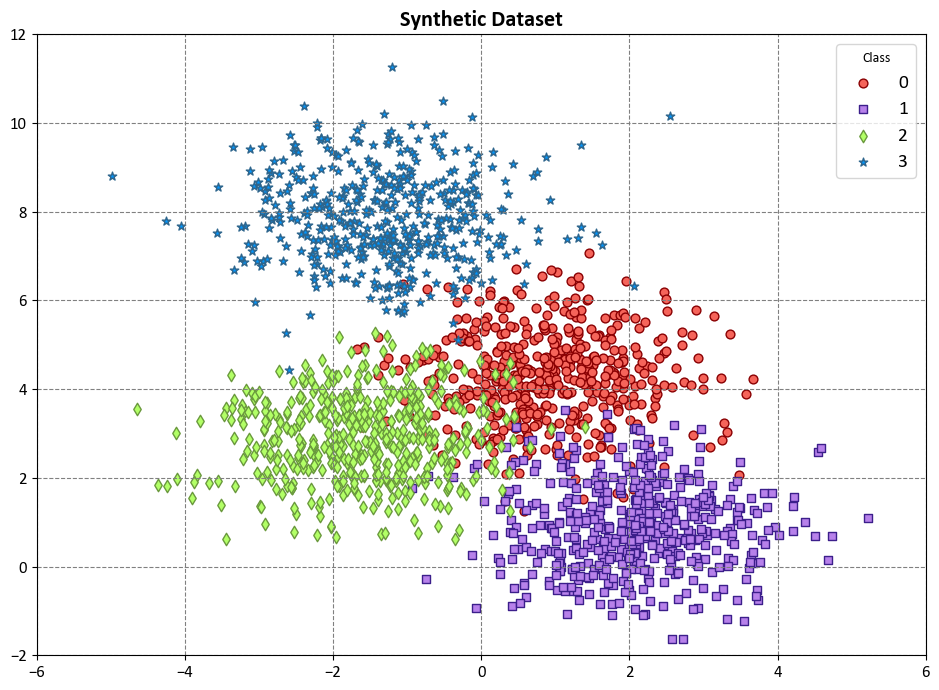

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

colors = ["#f5645a", "#b781ea", '#B2FF66', '#0096ff']
edge_colors = ['#8A0002', '#3C1F8B', '#6A993D', '#2e658c']
markers = ['o', 's', 'd', '*']
# Generate synthetic data
X, y = make_blobs(n_samples=2000, centers=4, random_state=0, cluster_std=1.0)


# Create a scatter plot using Seaborn
fig, ax = plt.subplots(1, 1, figsize=(9.5, 7))

for num in np.unique(y):
    ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
               s=40, ec=edge_colors[num], marker=markers[num], label=str(num))

ax.grid(True)
ax.legend(title='Class', fontsize=14)
ax.set(xlim=[-6, 6], ylim=[-2, 12])
ax.set_title('Synthetic Dataset', weight = 'bold', fontsize = 16)
plt.tight_layout()

In [11]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

def _Line(n = 80):
    print(n * '_')
    
def print_bold(txt):
    _left = "\033[1;31m"
    _right = "\033[0m"
    print(_left + txt + _right)
    
# Initialize StratifiedKFold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# The splitt would be 80-20!

# Lists to store train and test scores for each fold
train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []
train_class_proportions, test_class_proportions = [], []

cls = SVC(kernel = 'rbf')
    
# Perform Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    cls.fit(X_train, y_train)
    
    # Calculate class proportions for train and test sets
    train_class_proportions.append([np.mean(y_train == cls) for cls in np.unique(y)])
    test_class_proportions.append([np.mean(y_test == cls) for cls in np.unique(y)])
    
    # train
    y_train_pred = cls.predict(X_train)
    train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))
    
    # test
    y_test_pred = cls.predict(X_test)
    test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

_Line()
#  Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print_bold(f'Fold {fold + 1}:')
    print(f"\tTrain Class Proportions: {train_class_proportions[fold]}*{len(y_train)}")
    print(f"\tTest Class Proportions: {test_class_proportions[fold]}*{len(y_test)}")
    print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
    print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

_Line()
print_bold('Accuracy Score:')
print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
print_bold('F1 Score:')
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
_Line()

________________________________________________________________________________
Fold 1:
	Train Class Proportions: [0.25, 0.25, 0.25, 0.25]*1600
	Test Class Proportions: [0.25, 0.25, 0.25, 0.25]*400
	Train Accuracy Score = 0.9337, Test Accuracy Score = 0.9200
	Train F1 Score (weighted) = 0.9336, Test F1 Score (weighted)= 0.9198
Fold 2:
	Train Class Proportions: [0.25, 0.25, 0.25, 0.25]*1600
	Test Class Proportions: [0.25, 0.25, 0.25, 0.25]*400
	Train Accuracy Score = 0.9306, Test Accuracy Score = 0.9375
	Train F1 Score (weighted) = 0.9306, Test F1 Score (weighted)= 0.9377
Fold 3:
	Train Class Proportions: [0.25, 0.25, 0.25, 0.25]*1600
	Test Class Proportions: [0.25, 0.25, 0.25, 0.25]*400
	Train Accuracy Score = 0.9350, Test Accuracy Score = 0.9300
	Train F1 Score (weighted) = 0.9349, Test F1 Score (weighted)= 0.9299
Fold 4:
	Train Class Proportions: [0.25, 0.25, 0.25, 0.25]*1600
	Test Class Proportions: [0.25, 0.25, 0.25, 0.25]*400
	Train Accuracy Score = 0.9363, Test Accuracy Score = 

The metrics assessed include Accuracy Score and F1 Score (weighted) for both training and test datasets. For each fold, the Train and Test Class Proportions denote the distribution of classes within the respective datasets, illustrating a balanced representation with equal proportions across four classes. The Accuracy Score, which quantifies the ratio of correctly predicted instances to the total instances, exhibits a consistent and high performance across folds. The mean Train Accuracy Score is calculated as 0.9327 with a narrow standard deviation of 0.0030, highlighting the model's proficiency in correctly classifying instances within the training sets. Simultaneously, the mean Test Accuracy Score averages at 0.9325 with a slightly wider standard deviation of 0.0094, indicating robust generalization to unseen data. The F1 Score (weighted), a metric that balances precision and recall, provides additional insights into the model's classification capabilities. The mean Train F1 Score (weighted) is reported as 0.9326 with a standard deviation of 0.0030, underlining the model's ability to maintain a balance between precision and recall in the training sets. Similarly, the mean Test F1 Score (weighted) averages 0.9323 with a standard deviation of 0.0094, signifying the model's effectiveness in achieving a balanced performance on the test sets.

`````{admonition} Note
:class: warning

1. `metrics.accuracy_score` is a function commonly used in the context of classification tasks within the field of machine learning. It is part of the scikit-learn library in Python. This function is utilized to quantify the accuracy of a classification model by comparing the predicted labels against the true labels of a dataset.

    The accuracy score is calculated by dividing the number of correctly classified instances by the total number of instances. Mathematically, it can be expressed as:

    \begin{equation} \text{Accuracy} = \frac{\text{Number of Correctly Classified Instances}}{\text{Total Number of Instances}} \end{equation}

    In Python, using the `metrics.accuracy_score` function involves providing the true labels and the predicted labels as arguments. The function then returns a numerical value representing the accuracy of the classification model.

    It is important to note that while accuracy is a straightforward metric, it may not be sufficient in scenarios with imbalanced class distributions. In such cases, additional metrics like precision, recall, and F1-score might be more informative for evaluating the performance of a classification model.

1. The F1 Score, specifically in its weighted form, is a metric commonly employed in the evaluation of classification models. It provides a balance between precision and recall, offering a single numerical value that summarizes the model's performance across multiple classes in a weighted manner.

    The weighted F1 Score is calculated by considering both precision ($P$) and recall ($R$) for each class and then computing the harmonic mean of these values. The weighted aspect accounts for the imbalance in class sizes. Mathematically, it is defined as follows:

    \begin{equation} F1_{\text{weighted}} = \frac{\sum_{i=1}^{C} w_i \cdot F1_i}{\sum_{i=1}^{C} w_i} \end{equation}

    Where:
    - $ C $ is the number of classes.
    - $ F1_i $ is the F1 Score for class $ i $.
    - $ w_i $ is the weight assigned to class $ i $, typically proportional to the number of instances in that class.

    In Python, scikit-learn's `metrics.f1_score` function can be utilized to compute the F1 Score. When employing the 'weighted' parameter, it calculates the average F1 Score, considering the number of instances in each class as weights.

    This weighted F1 Score is particularly useful when dealing with imbalanced datasets, where certain classes may have significantly fewer instances than others. It provides a more nuanced evaluation of the model's ability to perform well across all classes, accounting for the influence of class size on the overall metric.

    <font color='Blue'><b>Example:</b></font> Let's consider a scenario where we have a classification model dealing with a dataset that includes three classes: A, B, and C. The dataset is imbalanced, meaning that the number of instances in each class is different. We want to compute the weighted F1 Score for this model.

    Here's a hypothetical example with class counts and F1 Scores for each class:

    - Class A: True Positives (TP) = 150, False Positives (FP) = 20, False Negatives (FN) = 10
    - Class B: TP = 80, FP = 5, FN = 30
    - Class C: TP = 40, FP = 10, FN = 5

    Class weights ($w_i$) can be determined based on the number of instances in each class. For simplicity, let's assume the weights are proportional to the number of instances in each class:

    - $w_{\text{A}} = 300$
    - $w_{\text{B}} = 115$
    - $w_{\text{C}} = 55$

    Now, we can compute the F1 Score for each class using the formula:

    \begin{equation} F1_i = \frac{2 \cdot \text{TP}_i}{2 \cdot \text{TP}_i + \text{FP}_i + \text{FN}_i} \end{equation}

    After calculating $F1_i$ for each class, we can then compute the weighted F1 Score using the formula mentioned earlier:

    \begin{equation} F1_{\text{weighted}} = \frac{w_{\text{A}} \cdot F1_{\text{A}} + w_{\text{B}} \cdot F1_{\text{B}} + w_{\text{C}} \cdot F1_{\text{C}}}{w_{\text{A}} + w_{\text{B}} + w_{\text{C}}} \end{equation}

    This weighted F1 Score provides a comprehensive evaluation of the model's performance, giving more importance to classes with a larger number of instances.

`````